## Preprocessing

In [6]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [8]:
# Determine the number of unique values in each column.
n = application_df.nunique(axis=0)
n

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

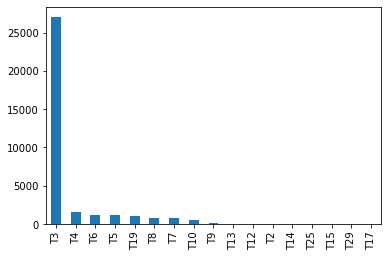

In [9]:
# histogram
# hist = application_df.hist(column='APPLICATION_TYPE')
application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar')

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(['T13', 'T12', 'T2','T25','T14','T29','T15','T17'], 'Other')

In [11]:
application_df['APPLICATION_TYPE']

0        T10
1         T3
2         T5
3         T3
4         T3
        ... 
34294     T4
34295     T4
34296     T3
34297     T5
34298     T3
Name: APPLICATION_TYPE, Length: 34299, dtype: object

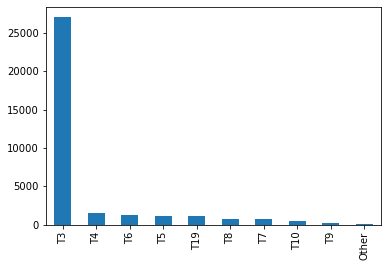

In [12]:
# histogram
application_df['APPLICATION_TYPE'].value_counts().plot(kind='bar')

In [13]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# # Replace in dataframe
# for app in application_types_to_replace:
#     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
# application_df['APPLICATION_TYPE'].value_counts()

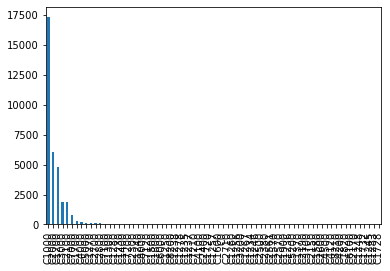

In [14]:
# Look at CLASSIFICATION value counts for binning
# histogram
application_df['CLASSIFICATION'].value_counts().plot(kind='bar')

In [15]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_n = application_df['CLASSIFICATION'].value_counts()
#select n greater than 1
classification_n[classification_n > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C4100        6
C2400        6
C1720        6
C1257        5
C1600        5
C0           3
C2710        3
C1260        3
C1256        2
C3200        2
C1267        2
C1234        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [16]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = classification_n[classification_n <= 20]
classifications_to_replace.index


# # Replace in dataframe
# for cls in classifications_to_replace:
#     application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df['CLASSIFICATION'].value_counts()

Index(['C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238',
       'C1278', 'C1235', 'C1237', 'C7210', 'C4100', 'C2400', 'C1720', 'C1257',
       'C1600', 'C0', 'C2710', 'C1260', 'C1256', 'C3200', 'C1267', 'C1234',
       'C1246', 'C2500', 'C2380', 'C2561', 'C1570', 'C2570', 'C1900', 'C1236',
       'C5200', 'C1370', 'C2190', 'C3700', 'C2150', 'C1580', 'C2600', 'C4500',
       'C4120', 'C8210', 'C4200', 'C1820', 'C6100', 'C2170', 'C1248', 'C1732',
       'C1245', 'C1283', 'C1728'],
      dtype='object')

In [17]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classifications_to_replace.index, 'Other')

In [18]:
# # Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
Other      227
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [19]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [28]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

target_y = application_df["IS_SUCCESSFUL"]

features_x = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

x_train, x_test, y_train, y_test = train_test_split(features_x, target_y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25724, 59), (8575, 59), (25724,), (8575,))

In [34]:
# Create a StandardScaler instances  (make it into normal distribution)
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

## Compile, Train and Evaluate the Model

In [5]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

# Second hidden layer
#  YOUR CODE GOES HERE

# Output layer
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

NameError: name 'tf' is not defined

In [ ]:
# Compile the model
#  YOUR CODE GOES HERE

In [ ]:
# Train the model
#  YOUR CODE GOES HERE

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE